# Fourier Analysis

## Introduction

This is a tutorial on some Fourier Analysis topics using SymPy and Python.

This notebook uses ``ipywidgets`` to create some interactive widgets. Refer to the [installation guide](https://ipywidgets.readthedocs.io/en/stable/user_install.html) if needed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from ipywidgets import interact, fixed
from IPython.display import display

In [2]:
%matplotlib notebook
init_session()

IPython console for SymPy 1.2 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [3]:
plt.style.use(u"seaborn-notebook")
plt.rcParams["figure.figsize"] = 6, 4

## Fourier Series

### An example

Let's start with some examples of Fourier series approximation of
common periodic signals, namely:

- Square;
- Sawtooth;
- Triangle; and
- Circle (semicircle, actually).

In [4]:
from scipy.special import j1

def waves(N=10, f=1, wtype='square'):
    """Plot the Fourier series approximation for a signal
    
    N is the number of terms to consider in the approximation,
    f is the frequency of the signal, and wtype is the type of
    signal, the options are ('square','sawtooth','triangle','circ').
    """
    
    t = np.linspace(0, 2, 1000)
    x = np.zeros_like(t)
   
    for k in range(1, N+1):
        if wtype=='square':
            x = x + 4/np.pi*np.sin(2*np.pi*(2*k - 1)*f*t)/(2*k-1)
        if wtype=='sawtooth':
            x = x + 2*(-1)**(k+1)/np.pi*np.sin(2*np.pi*k*f*t)/k
        if wtype=='triangle':
            n = k - 1
            x = x + 8/np.pi**2*(-1)**n*np.sin(2*np.pi*(2*n + 1)*f*t)/(2*n +1)**2
        if wtype=='circ':
            n = k - 1
            if n == 0:
                x = x + 0.25*np.pi
            else:
                x = x + (-1)**n*j1(n*np.pi)/n*np.cos(2*np.pi*n*f*t)
    
    plt.subplots(figsize=(6,4))
    plt.plot(t, x, linewidth=2, color="#e41a1c")
    plt.ylim(-1.5, 1.5)

In [5]:
w = interact(waves,
             N=(1,400),
             f=(1.,10.),
             wtype=['square','sawtooth','triangle','circ'])

interactive(children=(IntSlider(value=10, description='N', max=400, min=1), FloatSlider(value=1.0, description…

## Using Sympy

In the previous example, we hardcoded the representation of the signal.
This example take advantage of the function ``fourier_series`` that
returns the Fourier series for a given function. To get the approximated
version (with `n` terms) we can use the method ``.truncate(n)``.

In [6]:
def fourier(fun, approx_fun, half_width=pi, n=5):
    """
    Plot the Fourier series approximation using Sympy
    
    Parameters
    ----------
    fun : Sympy expression
        Original function.
    approx_fun : Sympy FourierSeries
        Fourier Series representation of ``fun``.
    hald_width : Sympy "number"
        Half-period of the signal.
    n : integer
        Number of terms to consider.
    """
    fun_np = lambdify((x), fun, "numpy")
    approx_np = lambdify((x), approx_fun.truncate(n), "numpy")
    x_np = np.linspace(-float(half_width), float(half_width), 201)
    
    plt.subplots(figsize=(6,4))
    plt.plot(x_np, fun_np(x_np), color="#e41a1c", linewidth=2,
             label="Function")
    plt.plot(x_np, approx_np(x_np), color="black", linestyle="dashed",
             linewidth=2, label="Approximation")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [7]:
fun = x**2
approx_fun = fourier_series(x**2, (x, -pi, pi))

In [8]:
interact(fourier,
         fun=fixed(fun),
         approx_fun=fixed(approx_fun),
         half_width=fixed(1),
         n=(1, 50));

interactive(children=(IntSlider(value=5, description='n', max=50, min=1), Output()), _dom_classes=('widget-int…

We can also represent functions in several variables.

The next example shows the Fourier representation of a (rotated)
hyperbolic paraboloid.

In [9]:
def fourier2D_xy(m_terms=5, n_terms=5):
    """Plot the 2D Fourier approximation for a hyperbolic paraboloid
    
    m_terms, and n_terms are the number of terms in x and y.
    
    The values are padded to be between [-0.9 pi, 0.9 pi] to avoid the
    discontinuities in the border of the domain.
    """
    Y, X = 0.9*np.pi * np.mgrid[-1:1:21j, -1:1:21j]
    XY = np.zeros_like(X)
    for cont_x in range(1, m_terms + 1):
        for cont_y in range(1, n_terms + 1):
            XY = XY + (-1)**(cont_x + cont_y) * \
                np.sin(cont_x*X) * np.sin(cont_y*Y)/(cont_x*cont_y)
    
    XY = 4*XY
    
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, XY, cmap="Purples_r", cstride=1, rstride=1, alpha=0.8,
                   lw=0.2)
    ax.plot_wireframe(X, Y, X*Y, cstride=1, rstride=1, color="#e41a1c",
                     linewidth=1)

In [10]:
interact(fourier2D_xy,
         m_terms=(1, 50),
         n_terms=(1, 50));

interactive(children=(IntSlider(value=5, description='m_terms', max=50, min=1), IntSlider(value=5, description…

## Fourier transforms

First, let's compute the Fourier Tranform of a Gaussian function.

In [11]:
f = exp(-x**2)
F = fourier_transform(f, x, y)
F

Let's compute the Fourier transform of a square function

In [12]:
y = symbols("y", positive=True)

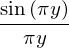

In [13]:
square = Piecewise((0, x<-S(1)/2), (0, x>S(1)/2), (1, True))
T_square = fourier_transform(square, x, y)
T_square = simplify(T_square.rewrite(sin))
T_square

<IPython.core.display.Javascript object>


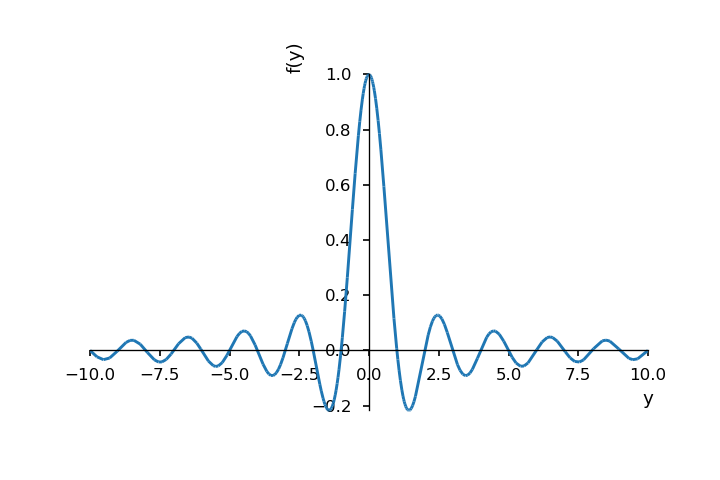

In [14]:
plot(T_square);

We can explicitly solve the last integral

In [15]:
y = symbols("y", nonzero=True)
FT = integrate(exp(-2*pi*I*x*y), (x, -S(1)/2, S(1)/2))

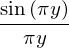

In [16]:
FT = simplify(FT.rewrite(sin))
FT

<IPython.core.display.Javascript object>


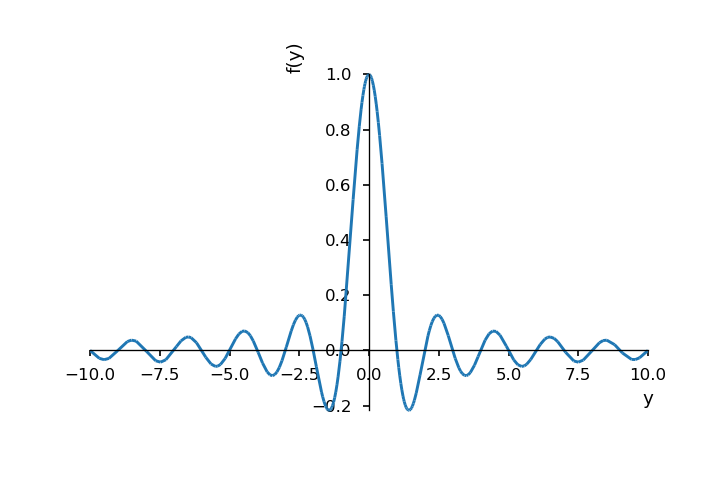

In [17]:
plot(FT);

## Fast Fourier Transform (FFT)

### Spectrogram

Let's  compute the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) for an audio file. We will pick an arpeggio in guitar.

In [18]:
from scipy.io import wavfile

In [19]:
rate, signal = wavfile.read("nst_arpeggios_c_audio.wav")
nsamples = signal.shape[0]
time = np.linspace(0, nsamples/rate, nsamples)

<IPython.core.display.Javascript object>


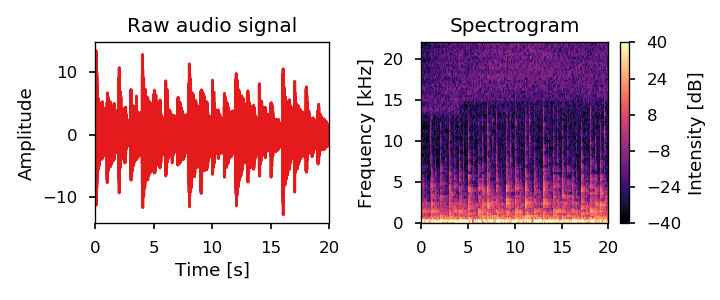

/home/nguarinz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


In [20]:
# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2.5))
fig.tight_layout()

# Time plot
#ax1.set_figure(figsize=(3.5, 2.5))
ax1.plot(time, signal[:, 0]/1000, color="#e41a1c")
ax1.set_title('Raw audio signal')
ax1.set_xlim(0, 20)
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Amplitude")

# Spectrogram
Pxx, freqs, bins, im = ax2.specgram(signal[:, 0], Fs=rate,
                                   cmap="magma")
ax2.set_ylim([0, max(freqs)])
ax1.set_xlabel("Time [s]")
ax2.set_ylabel("Frequency [kHz]")
ax2.set_title('Spectrogram');
bound = np.linspace(-40, 40, 51)
cb = fig.colorbar(im, boundaries=bound, ticks=bound[::10])
cb.set_label('Intensity [dB]')
cb.set_clim(-40, 40)

# Rescale y-axis
scale = 1e3  # KHz
ticks = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
ax2.yaxis.set_major_formatter(ticks)
plt.tight_layout();

### FFT using ``scipy.fftpack``

> This section is copied from [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html).

The ``scipy.fftpack`` module allows to compute fast Fourier transforms. As an illustration, a (noisy) input signal may look like:

In [21]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

The observer doesn’t know the signal frequency, only the sampling time step of the signal sig. The signal is supposed to come from a real function so the Fourier transform will be symmetric. The ``scipy.fftpack.fftfreq()`` function will generate the sampling frequencies and ``scipy.fftpack.fft()`` will compute the fast Fourier transform:

In [22]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

Because the resulting power is symmetric, only the positive part of the spectrum needs to be used for finding the frequency:

In [23]:
pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

<IPython.core.display.Javascript object>


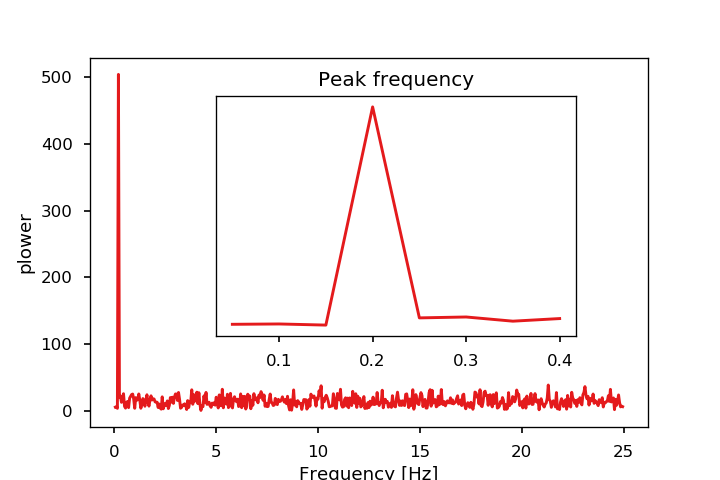

In [24]:
plt.figure()
plt.plot(freqs, power, color="#e41a1c")
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8], color="#e41a1c")
plt.setp(axes, yticks=[]);

The signal frequency can be found by:

In [25]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)  # check that correct freq is found

True

Now the high-frequency noise will be removed from the Fourier transformed signal:

In [26]:
sig_fft[np.abs(sample_freq) > freq] = 0

The resulting filtered signal can be computed by the ``scipy.fftpack.ifft()`` function:

In [27]:
main_sig = fftpack.ifft(sig_fft)

<IPython.core.display.Javascript object>


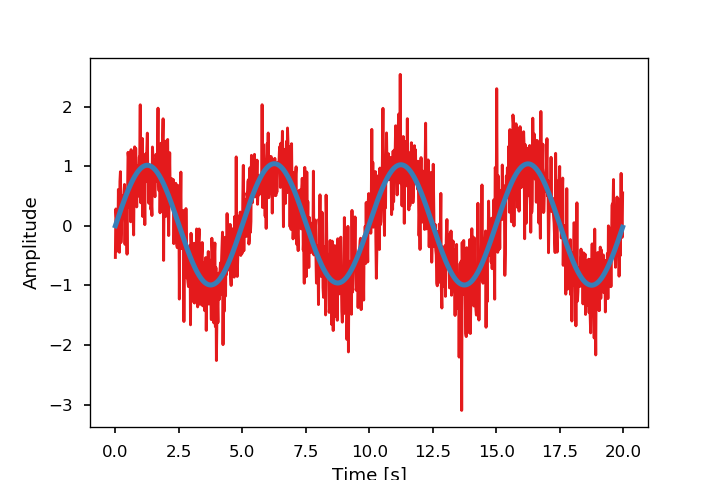

In [28]:
plt.figure()
plt.plot(time_vec, sig, color="#e41a1c")
plt.plot(time_vec, np.real(main_sig), linewidth=3, color="#377eb8")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude');

>  **``numpy.fft``**

> Numpy also has an implementation of FFT (``numpy.fft``). However, in general the scipy one should be preferred, as it uses more efficient underlying implementations.


## References

- Gael Varoquaux et al.[Scipy Lecture Notes](http://www.scipy-lectures.org/index.html), 2017.  DOI: http://doi.org/10.5281/zenodo.31521

The next cell change the format of the notebook.

In [29]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()